<a href="https://colab.research.google.com/github/PaulinhaSan/POS_TECH_FIAP/blob/main/Desafio_fase1_tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas importadas

In [1]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

# Limpeza e tratamento inicial dos dados

## Importando o dataset

In [34]:
# importando o dataset
importacao = pd.read_csv('/content/ImpVinhos.csv', sep=';')
importacao.head(5)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.00,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,"738,116.00","2,266,827.00"
1,2,Alemanha,52297,"30,498.00",34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,"92,600.00","438,595.00"
2,3,Argélia,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.00
3,4,Arábia Saudita,0,0.00,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.00,0.00
4,5,Argentina,19525,"12,260.00",24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,"27,980,574.00","87,519,642.00"


## Limpeza

In [35]:
# excluindo a coluna 'Id'

importacao = importacao.drop('Id', axis=1)
importacao.head(3)

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Africa do Sul,0,0.00,0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,"738,116.00","2,266,827.00"
1,Alemanha,52297,"30,498.00",34606,26027,134438,92103,111523,98638,219173,...,142971,516975,101055,412794,136992,504168,106541,546967,"92,600.00","438,595.00"
2,Argélia,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.00


In [36]:
#Análise somente dos últimos 15 anos
colunas = importacao.columns[-30:]
colunas = colunas.insert(0, 'País')
importacao = importacao[colunas]
importacao.head(3)

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Africa do Sul,315380,1151699,493093,1931449,966276,3600658,507509,2136394,722327,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,"738,116.00","2,266,827.00"
1,Alemanha,293935,1063825,56075,291876,192661,784674,198025,933545,113243,...,142971,516975,101055,412794,136992,504168,106541,546967,"92,600.00","438,595.00"
2,Argélia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.00


## Retirando países que nao fazem importacao

In [38]:
importacao['total'] = importacao.sum(numeric_only=True, axis=1)
paises_importacao_zero = importacao[importacao['total'] == 0]
importacao = importacao.drop(paises_importacao_zero.index, axis=0)
importacao = importacao.drop('total', axis=1)
importacao.head(10)

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Africa do Sul,315380,1151699,493093,1931449,966276,3600658,507509,2136394,722327,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,"738,116.00","2,266,827.00"
1,Alemanha,293935,1063825,56075,291876,192661,784674,198025,933545,113243,...,142971,516975,101055,412794,136992,504168,106541,546967,"92,600.00","438,595.00"
2,Argélia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.00
3,Arábia Saudita,0,0,0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.00,0.00
4,Argentina,14417761,37382581,13902750,38521731,16965266,52126581,16673491,58806736,14613839,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,"27,980,574.00","87,519,642.00"
5,Armênia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"2,385.00","13,668.00"
6,Austrália,215135,1248671,270908,998680,405271,1864846,824440,2811273,615334,...,3518,21664,16292,1214643,212595,792051,366875,1383093,"579,279.00","1,590,059.00"
7,Áustria,11388,73348,1895,12073,2329,30075,6357,56227,8098,...,513995,1567866,348289,128379,6540,52348,13427,141822,"7,403.00","53,974.00"
8,Bermudas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,141,1.00,4.00
9,Bélgica,0,0,0,0,0,0,0,0,0,...,163,1201,7,30,0,0,0,0,0.00,0.00


## Separando quantidade de valor

In [41]:
# separando os valores das variáveis 'quantidade' e 'valor' que hoje estão no dataset
quantidadel = []
valoruss = []

for item in importacao.columns:
  if item == 'País':
    quantidadel.append(item)
    valoruss.append(item)
  elif len(item) == 4:
    quantidadel.append(item)
  else:
    valoruss.append(item)

In [42]:
# criando dataframes separados para quantidade e valor

quantidade_l = importacao[quantidadel]
quantidade_l = quantidade_l.set_index('País')
valor_uss = importacao[valoruss]
valor_uss = valor_uss.set_index('País')

In [43]:
display(quantidade_l.head(2))
display(valor_uss.head(2))


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Africa do Sul,315380,493093,966276,507509,722327,475331,722715,743335,578829,1138732,1127053,1092042,627150,859169,"738,116.00"
Alemanha,293935,56075,192661,198025,113243,114866,115804,95171,158386,83289,142971,101055,136992,106541,"92,600.00"


,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,
Africa do Sul,1151699,1931449,3600658,2136394,3041449,1985184,3033932,2996543,1686226,3241298,3574371,3604038,1701072,2508140,"2,266,827.00"
Alemanha,1063825,291876,784674,933545,591167,414070,483316,358275,606333,315959,516975,412794,504168,546967,"438,595.00"


In [44]:
# retirando o '.1' do valor da coluna
colunas = valor_uss.columns.str[:-2]
valor_uss.columns = colunas
valor_uss.head(2)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Africa do Sul,1151699,1931449,3600658,2136394,3041449,1985184,3033932,2996543,1686226,3241298,3574371,3604038,1701072,2508140,"2,266,827.00"
Alemanha,1063825,291876,784674,933545,591167,414070,483316,358275,606333,315959,516975,412794,504168,546967,"438,595.00"


## Criando dataframe único (funcao - Melt)

In [56]:
# fazendo o melt e criando um dataframe único com informações de quantidade e valor

valor_uss2 = valor_uss.reset_index('País')
quantidade_l2 = quantidade_l.reset_index('País')

quantidade_l2 = quantidade_l2.melt(id_vars=['País'], value_vars=quantidade_l.columns)
valor_uss2 = valor_uss2.melt(id_vars=['País'], value_vars=valor_uss.columns)

display(quantidade_l2.head(5))
display(valor_uss2.head(5))

,País,variable,value
0,Africa do Sul,2008,"315,380.00"
1,Alemanha,2008,"293,935.00"
2,Argélia,2008,0.00
3,Arábia Saudita,2008,0.00
4,Argentina,2008,"14,417,761.00"


,País,variable,value
0,Africa do Sul,2008,"1,151,699.00"
1,Alemanha,2008,"1,063,825.00"
2,Argélia,2008,0.00
3,Arábia Saudita,2008,0.00
4,Argentina,2008,"37,382,581.00"


In [57]:
# renomeando as colunas para a correta identificação das variáveis

quantidade_l2.columns = ['pais_origem', 'ano', 'quantidade_l']
valor_uss2.columns = ['pais_origem', 'ano', 'valor_uss']

display(quantidade_l2.head(5))
display(valor_uss2.head(5))

,pais_origem,ano,quantidade_l
0,Africa do Sul,2008,"315,380.00"
1,Alemanha,2008,"293,935.00"
2,Argélia,2008,0.00
3,Arábia Saudita,2008,0.00
4,Argentina,2008,"14,417,761.00"


,pais_origem,ano,valor_uss
0,Africa do Sul,2008,"1,151,699.00"
1,Alemanha,2008,"1,063,825.00"
2,Argélia,2008,0.00
3,Arábia Saudita,2008,0.00
4,Argentina,2008,"37,382,581.00"


In [58]:
# fazendo o .join() entre as duas tabelas para tranasformá-la em uma só
importacao_long = quantidade_l2.join(valor_uss2['valor_uss'])
importacao_long.head(5)

,pais_origem,ano,quantidade_l,valor_uss
0,Africa do Sul,2008,"315,380.00","1,151,699.00"
1,Alemanha,2008,"293,935.00","1,063,825.00"
2,Argélia,2008,0.00,0.00
3,Arábia Saudita,2008,0.00,0.00
4,Argentina,2008,"14,417,761.00","37,382,581.00"


In [59]:
importacao_long.describe()

,quantidade_l,valor_uss
count,900.00,900.00
mean,"1,589,765.79","4,967,944.78"
std,"6,625,423.67","18,900,785.84"
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,"21,294.25","95,456.50"
max,"72,726,186.00","184,335,335.00"


## Análises e Gráficos

In [60]:
importacao_long_por_pais = importacao_long.groupby(by='pais_origem').sum(numeric_only=True)
importacao_long_por_pais = importacao_long_por_pais.sort_values(by='valor_uss', ascending=False)
importacao_long_por_pais.sum()

quantidade_l   1,430,789,211.00
valor_uss      4,471,150,298.00
dtype: float64

In [116]:
importacao_long_por_pais_top10 = importacao_long_por_pais.head(10)
importacao_long_por_pais_top10 = importacao_long_por_pais_top10.reset_index('pais_origem')
importacao_long_por_pais_top10.head(10)

,pais_origem,quantidade_l,valor_uss,dolar_por_litro
0,Chile,"635,145,630.00","1,777,180,287.00",2.80
1,Argentina,"253,998,364.00","831,556,301.00",3.27
2,Portugal,"204,913,978.00","639,627,463.00",3.12
3,Itália,"148,158,291.00","460,515,209.00",3.11
4,França,"61,166,812.00","337,156,571.00",5.51
5,Espanha,"61,862,689.00","210,931,928.00",3.41
6,Uruguai,"33,589,398.00","85,362,297.00",2.54
7,Africa do Sul,"11,107,057.00","38,459,280.00",3.46
8,Estados Unidos,"7,625,542.00","37,153,549.00",4.87
9,Austrália,"5,547,765.00","21,158,618.00",3.81


In [117]:
df_aux = pd.read_excel('/content/Importacao_vinhos_tabela_iso_cod.xlsx')
df_aux.head(10)

,cod_num,pais,iso_alpha
0,152,Chile,CHL
1,32,Argentina,ARG
2,620,Portugal,PRT
3,380,Itália,ITA
4,250,França,FRA
5,724,Espanha,ESP
6,858,Uruguai,URY
7,710,África do Sul,ZAF
8,840,Estados Unidos,USA
9,36,Austrália,AUS


In [118]:
# Unificando as tabelas com a funcao Join()
importacao_long_por_pais_top10 = importacao_long_por_pais_top10.join(df_aux[['cod_num', 'iso_alpha']])
importacao_long_por_pais_top10.head(2)

,pais_origem,quantidade_l,valor_uss,dolar_por_litro,cod_num,iso_alpha
0,Chile,"635,145,630.00","1,777,180,287.00",2.80,152,CHL
1,Argentina,"253,998,364.00","831,556,301.00",3.27,32,ARG


In [119]:
importacao_long_por_pais_top10['pais_destino'] = 'Brasil'
importacao_long_por_pais_top10 = importacao_long_por_pais_top10.head(10)
importacao_long_por_pais_top10

,pais_origem,quantidade_l,valor_uss,dolar_por_litro,cod_num,iso_alpha,pais_destino
0,Chile,"635,145,630.00","1,777,180,287.00",2.80,152,CHL,Brasil
1,Argentina,"253,998,364.00","831,556,301.00",3.27,32,ARG,Brasil
2,Portugal,"204,913,978.00","639,627,463.00",3.12,620,PRT,Brasil
3,Itália,"148,158,291.00","460,515,209.00",3.11,380,ITA,Brasil
4,França,"61,166,812.00","337,156,571.00",5.51,250,FRA,Brasil
5,Espanha,"61,862,689.00","210,931,928.00",3.41,724,ESP,Brasil
6,Uruguai,"33,589,398.00","85,362,297.00",2.54,858,URY,Brasil
7,Africa do Sul,"11,107,057.00","38,459,280.00",3.46,710,ZAF,Brasil
8,Estados Unidos,"7,625,542.00","37,153,549.00",4.87,840,USA,Brasil
9,Austrália,"5,547,765.00","21,158,618.00",3.81,36,AUS,Brasil


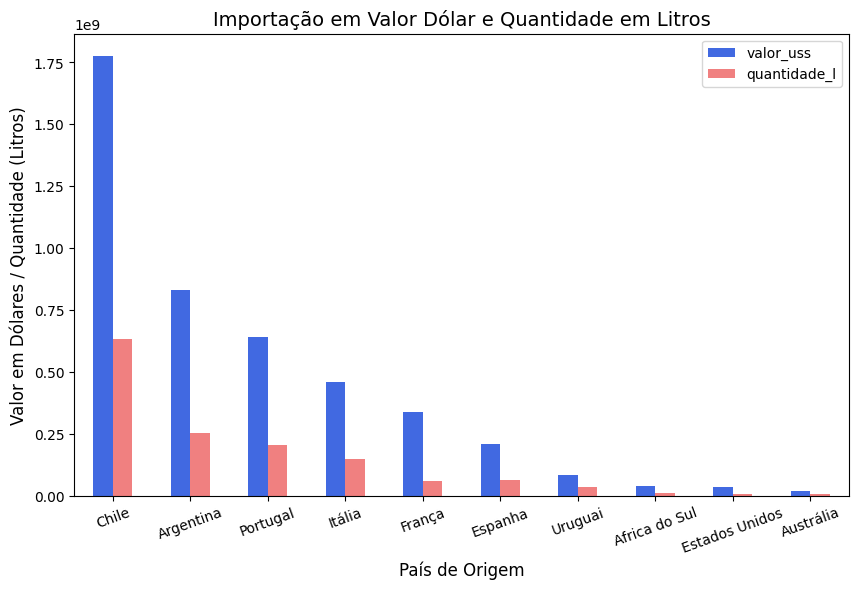

In [122]:
importacao_long_por_pais_top10.plot(x='pais_origem', y=['valor_uss', 'quantidade_l'], kind='bar', figsize=(10, 6), color=['royalblue', 'lightcoral'])

# Personalize o gráfico
plt.xlabel('País de Origem', fontsize=12)  # Rótulo do eixo x
plt.ylabel('Valor em Dólares / Quantidade (Litros)', fontsize=12)  # Rótulo do eixo y
plt.title('Importação em Valor Dólar e Quantidade em Litros', fontsize=14)  # Título do gráfico
plt.xticks(rotation=20)  # Rotação dos rótulos no eixo x para melhor legibilidade

# Mostra o gráfico
plt.show()

Analisando os países de maior importação comparado aos países que estão na lista de top 10 exportadores do Brasil. Temos dois Países que se repetem, que são eles Estados Unidos e Espanha.
Sendo assim são países que possuem um poder de comercialização no mercado de vinicola, e tendem a crescer como país exportador. Permanecendo o Paraguai com forte tendência em permanecer sendo o maior comprador do Brasil.





In [99]:
importacao_long_por_pais['dolar_por_litro'] = importacao_long_por_pais['valor_uss'] / importacao_long_por_pais['quantidade_l']
importacao_long_por_pais.head(10)

,quantidade_l,valor_uss,dolar_por_litro
pais_origem,,,
Chile,"635,145,630.00","1,777,180,287.00",2.80
Argentina,"253,998,364.00","831,556,301.00",3.27
Portugal,"204,913,978.00","639,627,463.00",3.12
Itália,"148,158,291.00","460,515,209.00",3.11
França,"61,166,812.00","337,156,571.00",5.51
Espanha,"61,862,689.00","210,931,928.00",3.41
Uruguai,"33,589,398.00","85,362,297.00",2.54
Africa do Sul,"11,107,057.00","38,459,280.00",3.46
Estados Unidos,"7,625,542.00","37,153,549.00",4.87


In [102]:
#Fazendo ajustes no dataframe imortacao_long... e ordenando por dolar
importacao_long_por_dolar_por_litro = importacao_long_por_pais.head(10)
importacao_long_por_dolar_por_litro = importacao_long_por_dolar_por_litro.sort_values(by='dolar_por_litro', ascending=False)

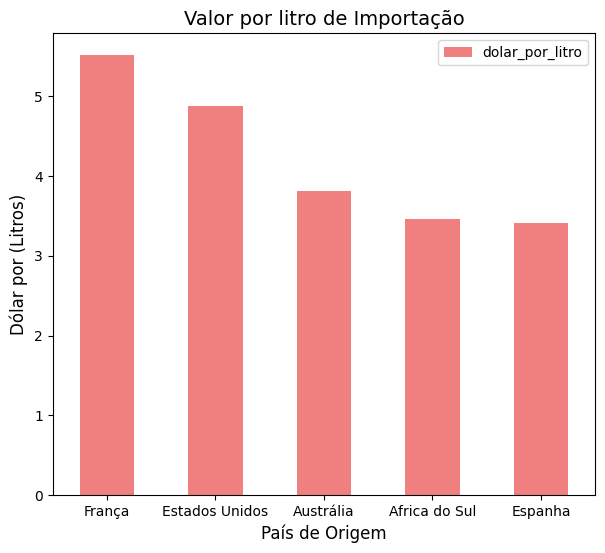

In [130]:
#Plotando o gráfico
importacao_long_por_dolar_por_litro.head().plot(y='dolar_por_litro', kind='bar', figsize=(7, 6), color='lightcoral')

# Personalize o gráfico
plt.xlabel('País de Origem', fontsize=12)  # Rótulo do eixo x
plt.ylabel('Dólar por (Litros)', fontsize=12)  # Rótulo do eixo y
plt.title('Valor por litro de Importação', fontsize=14)  # Título do gráfico
plt.xticks(rotation=0)  # Rotação dos rótulos no eixo x para melhor legibilidade

# Mostra o gráfico
plt.show()

Observando os dados pelo valor de importação em dólares por litro, é possível verificar que os estados Unidos e a Espanha permanecem na lista em posições mais altas. Seguem no top 5 países que mais lucram com a importação, não tendo um possível interesse significativo em contribuir com o crescimento do Brasil em exportação como o Paraguai.